#College Admission Predictor by Sainesh!

##Most College Admisssion committees use a predictor of some form on some features(GPA, SAT/GRE, etc) for their initial screening.

Today, we will work on making a predictor for our university. Let's understand the problem first.


**Question :**

 Build a linear perceptron to predict whether a student will be accepted to a certain university or not based on three features.

**Features:**

X1 : GPA
X2: Drive To Succeed(0-2000) **(we will consider it a tangible feature and grade
it for each student between 0-2000)**

X3: Hours(hours study per week)

**Training dataset:**

X1 : GPA:                        3.5, 4.0, 2.8

X2: Drive :                    1750, 2000, 1500

X3: Hours(hours study per week): 20 10 15

output: (Accepted or not) :      no, yes, no


Will I be accepted with a GPA : 3, Drive : 1900 and Hours of study per week : 10.

Write the equation representing the decision line.

**Solution**

First and foremost, let's understand the steps that we need to perform.
What are they?
1. Defining the training data
2. Initializing the internal parameters (weights and bias). Defining the activation function -> We will use the step activation function
3. Define our perceptron model
4. Initialize the learning rate(0.1) and no. of epochs (1)
5. Training the perceptron for each data instance that we have
and adjusting the weights and bias accordingly.
6. Using our model to check new entries if they can be classified or not.

Prediction for the new student's acceptance: Accepted


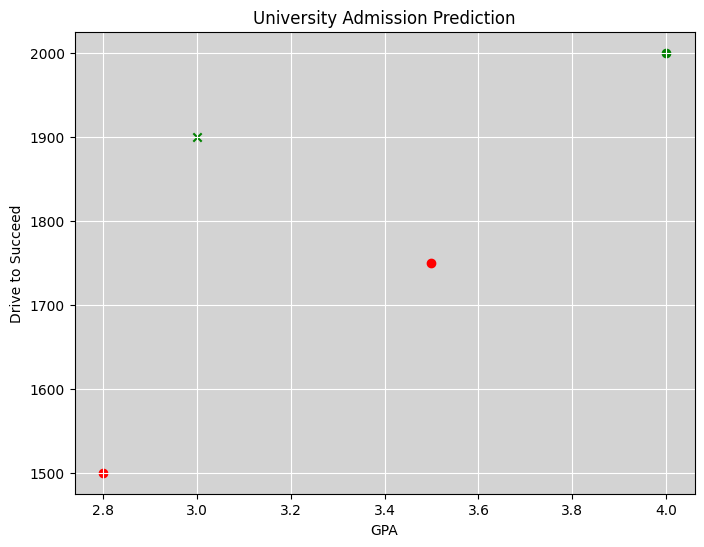

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data
X = np.array([[3.5, 1750, 20], [4.0, 2000, 10], [2.8, 1500, 15]])
y = np.array([0, 1, 0])  # 0 for 'no', 1 for 'yes'

# Initialize the internal parameters (weights and bias)
weights = [0,0,0]
bias = 0

# Define the perceptron model and activation function
def perceptron(X, weights, bias):
    return np.dot(X, weights) + bias

#why use this? Can directly pass an output array and will give us an array of the
#y_pred using our step function(activation function) on each of the output elements
##documentation of np.where (https://numpy.org/doc/stable/reference/generated/numpy.where.html)
def activation_function(output):
    return np.where(output > 0, 1, 0)

# Initialize the learning rate and epochs
learning_rate = 0.1
epochs = 1

# Function that contains our perceptron training logic (backpropagation)
def train_perceptron(X, y, weights, bias, learning_rate,epochs):
    for _ in range(0,epochs):
      for i in range(len(X)):
          output = perceptron(X[i], weights, bias)
          predicted = activation_function(output)
          #d-> error in actual output and our predicted output
          d = y[i] - predicted
          #adjusting weights and bias using the learning rate, error and feature
          #why weights but single X-> entry?
          #because we adjust our weights for each observation.
          weights =weights + learning_rate * d * X[i]
          bias = bias + learning_rate * d
    return weights, bias

# Train our perceptron
updated_weights, updated_bias = train_perceptron(X, y, weights, bias, learning_rate,epochs)

# Potential new student data point
new_student = np.array([3, 1900, 10])

# Predicting the acceptance or rejection of the new potential student using our trained perceptron model
z_new_student = perceptron(new_student, updated_weights, updated_bias)
prediction_new_student = activation_function(z_new_student)

# Prediction result
print("Prediction for the new student's acceptance:", 'Accepted' if prediction_new_student == 1 else 'Not Accepted')

def plot_decision_boundary(weights, bias, X, y, new_student):
    plt.figure(figsize=(8, 6))

    # Set background color
    plt.gca().set_facecolor('lightgray')

    # Plot training data
    for i in range(len(X)):
        if y[i] == 0:  # not accepted
            plt.scatter(X[i, 0], X[i, 1], color='red')
        else:  # accepted
            plt.scatter(X[i, 0], X[i, 1], color='green')

    # Set min and max values and give some padding
    x_min, x_max = 0, 5
    y_min, y_max = 1000, 2100

    # Plot our new student's data
    if prediction_new_student == 1:
        plt.scatter(new_student[0], new_student[1], color='green', marker='x')
    else:
        plt.scatter(new_student[0], new_student[1], color='blue', marker='x')

    # Add grid
    plt.grid(True, color='white')

    plt.xlabel('GPA')
    plt.ylabel('Drive to Succeed')
    plt.title('University Admission Prediction')
    plt.show()

# Call the function to plot
plot_decision_boundary(updated_weights, updated_bias, X, y, new_student)

The green cross signifies our new data point is Accepted. If he was rejected it would be a red cross.


## But this doesn't seem right, so what can we do? We can increase the number of epochs to better train the model. Doing so gives us the following result. The only difference in the above code and below code is that we increased the epochs/iterations in the below code:

Prediction for the new student's acceptance: Not Accepted


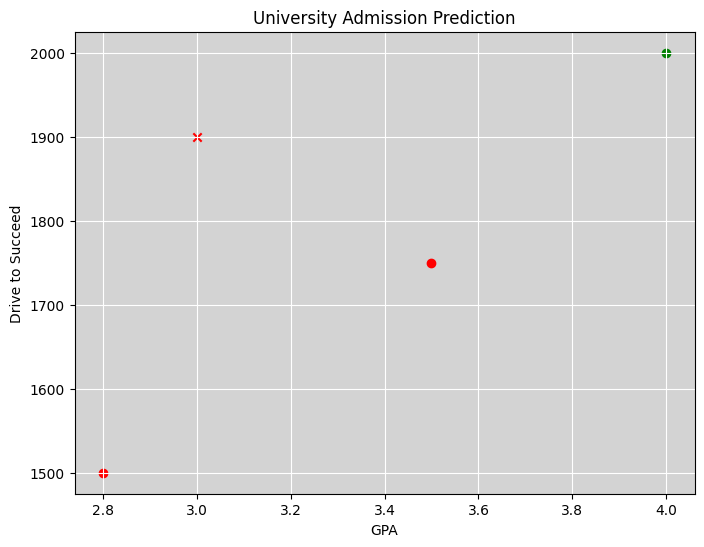

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data
X = np.array([[3.5, 1750, 20], [4.0, 2000, 10], [2.8, 1500, 15]])
y = np.array([0, 1, 0])  # 0 for 'no', 1 for 'yes'

# Initialize the internal parameters (weights and bias)
weights = [0,0,0]
bias = 0

# Define the perceptron model and activation function
def perceptron(X, weights, bias):
    return np.dot(X, weights) + bias

#why use this? Can directly pass an output array and will give us an array of the
#y_pred using our step function(activation function) on each of the output elements
##documentation of np.where (https://numpy.org/doc/stable/reference/generated/numpy.where.html)
def activation_function(output):
    return np.where(output > 0, 1, 0)

# Initialize the learning rate and epochs
learning_rate = 0.1
epochs = 100

# Function that contains our perceptron training logic (backpropagation)
def train_perceptron(X, y, weights, bias, learning_rate,epochs):
    for _ in range(0,epochs):
      for i in range(len(X)):
          output = perceptron(X[i], weights, bias)
          predicted = activation_function(output)
          #d-> error in actual output and our predicted output
          d = y[i] - predicted
          #adjusting weights and bias using the learning rate, error and feature
          #why weights but single X-> entry?
          #because we adjust our weights for each observation.
          weights =weights + learning_rate * d * X[i]
          bias = bias + learning_rate * d
    return weights, bias

# Train our perceptron
updated_weights, updated_bias = train_perceptron(X, y, weights, bias, learning_rate,epochs)

# Potential new student data point
new_student = np.array([3, 1900, 10])

# Predicting the acceptance or rejection of the new potential student using our trained perceptron model
z_new_student = perceptron(new_student, updated_weights, updated_bias)
prediction_new_student = activation_function(z_new_student)

# Prediction result
print("Prediction for the new student's acceptance:", 'Accepted' if prediction_new_student == 1 else 'Not Accepted')

def plot_decision_boundary(weights, bias, X, y, new_student):
    plt.figure(figsize=(8, 6))

    # Set background color
    plt.gca().set_facecolor('lightgray')

    # Plot training data
    for i in range(len(X)):
        if y[i] == 0:  # not accepted
            plt.scatter(X[i, 0], X[i, 1], color='red')
        else:  # accepted
            plt.scatter(X[i, 0], X[i, 1], color='green')

    # Set min and max values and give some padding
    x_min, x_max = 0, 5
    y_min, y_max = 1000, 2100

    # Plot the new student's data
    if prediction_new_student == 1:
        plt.scatter(new_student[0], new_student[1], color='green', marker='x')
    else:
        plt.scatter(new_student[0], new_student[1], color='red', marker='x')

    # Add grid
    plt.grid(True, color='white')

    plt.xlabel('GPA')
    plt.ylabel('Drive to Succeed')
    plt.title('University Admission Prediction')
    plt.show()

# Call the function to plot
plot_decision_boundary(updated_weights, updated_bias, X, y, new_student)

**Note To remember**: We must wisely choose the number of epochs else we might end up focussing too much on the training data and might not work well for new data. This is called **overfitting** of the model, where we focus too much on the training data, trying to fit all the values of the training data, which in turn leads to poorer results for new data. This happens because the model ends up capturing noise and inaccuracies in the training set rather than generalizing from the patterns

#Now let's try and visualize it against all the features that we have -> we currently have three
Thus, we will use the 3D visualization which we studied before


Prediction for the new student's acceptance: Not Accepted


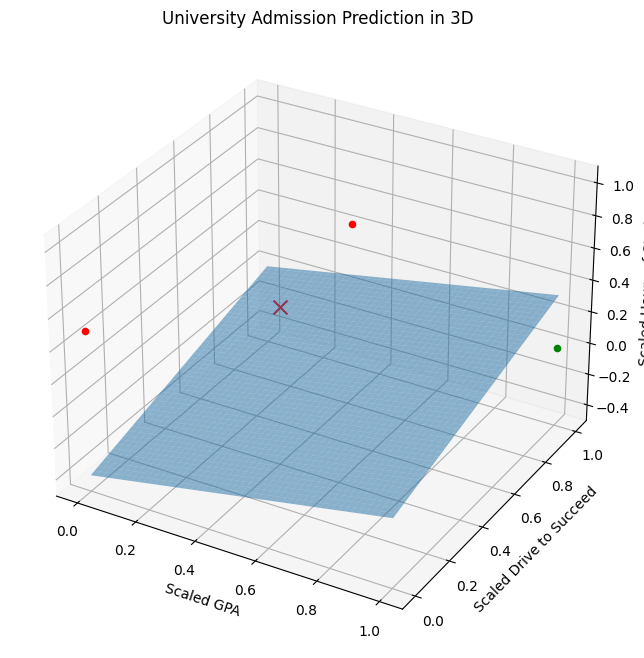

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import sys


# Define the training data
X = np.array([[3.5, 1750, 20], [4.0, 2000, 10], [2.8, 1500, 15]])
y = np.array([0, 1, 0])  # 0 for 'no', 1 for 'yes'

# Initialize the internal parameters (weights and bias)
weights = [0,0,0]
bias = 0

# Define the perceptron model and activation function
def perceptron(X, weights, bias):
    return np.dot(X, weights) + bias

#why use this? Can directly pass an output array and will give us an array of the
#y_pred using our step function(activation function) on each of the output elements
##documentation of np.where (https://numpy.org/doc/stable/reference/generated/numpy.where.html)
def activation_function(output):
    return np.where(output > 0, 1, 0)

# Initialize the learning rate and epochs
learning_rate = 0.1
epochs = 14

#Feature Scaling (Normalizing all data)
def feature_scaling(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max


X_scaled, X_min, X_max = feature_scaling(X)


# Function that contains our perceptron training logic (backpropagation)
def train_perceptron(X, y, weights, bias, learning_rate,epochs):
    for _ in range(0,epochs):
      for i in range(len(X)):
          output = perceptron(X[i], weights, bias)
          predicted = activation_function(output)
          #d-> error in actual output and our predicted output
          d = y[i] - predicted
          #adjusting weights and bias using the learning rate, error and feature
          #why weights but single X-> entry?
          #because we adjust our weights for each observation.
          weights =weights + learning_rate * d * X[i]
          bias = bias + learning_rate * d
    return weights, bias

# Train our perceptron
updated_weights, updated_bias = train_perceptron(X_scaled, y, weights, bias, learning_rate, epochs)

# Potential new student data point
new_student = np.array([3, 1900, 10])
new_student_scaled = (new_student - X_min) / (X_max - X_min)


# Predicting the acceptance or rejection of the new potential student using our trained perceptron model
z_new_student = perceptron(new_student_scaled, updated_weights, updated_bias)
prediction_new_student = activation_function(z_new_student)


# Prediction result
print("Prediction for the new student's acceptance:", 'Accepted' if prediction_new_student == 1 else 'Not Accepted')



def plot_decision_boundary_3d(weights, bias, X, y, new_student, X_min, X_max):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scale the training data for plotting
    X_plot = (X - X_min) / (X_max - X_min)

    # Plot scaled training data
    for i in range(len(X_plot)):
        if y[i] == 0:  # not accepted
            ax.scatter(X_plot[i, 0], X_plot[i, 1], X_plot[i, 2], color='red')
        else:  # accepted
            ax.scatter(X_plot[i, 0], X_plot[i, 1], X_plot[i, 2], color='green')

    #Axis ranged defined since we applied feature scaling
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    z_min, z_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    if weights[2] != 0:
        zz = (-weights[0] * xx - weights[1] * yy - bias) / weights[2]
    else:
        # to avoid zero error
        zz = np.zeros_like(xx)

    # Plot the decision boundary
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    # Plot the scaled new student's data
    ax.scatter(new_student[0], new_student[1], new_student[2], color='green' if prediction_new_student == 1 else 'red', marker='x', s=100)

    ax.set_xlabel('Scaled GPA')
    ax.set_ylabel('Scaled Drive to Succeed')
    ax.set_zlabel('Scaled Hours of Study')
    ax.set_title('University Admission Prediction in 3D')

    def update(frame):
        ax.view_init(elev=10, azim=frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)
    plt.show()
    ani.save('decision_boundary_animation.mp4', writer=animation.FFMpegWriter(fps=20))


plot_decision_boundary_3d(updated_weights, updated_bias, X, y, new_student_scaled, X_min, X_max)


#Feature Scaling
In order for machine learning models to interpret these features on the same scale, we need to perform feature scaling. This gives us better answers, since the features are adjusted and balanced in their contribution to the perceptron model.